In [2]:
import pandas as pd
from utils.error_analysis import plot_error_results

# Comparison

Hint: After this script please delete the followng folders, because they weight 1GB each:

minmax_0_1_relu_scaled

minmax_0_1_relu_unscaled

minmax_0_5_relu_scaled

minmax_0_5_relu_unscaled

minmax_0_1_scaled

minmax_0_1_unscaled

standard_scaled

standard_unscaled

In [3]:
# Load the data and keep important columns
standard_informer = pd.read_csv('./dataset_results/informer_loss_functions_results_unscaled.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]
standard_patchtst = pd.read_csv('./dataset_results/patchtst_loss_functions_results_unscaled.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]

minmax_0_1_relu_informer = pd.read_csv('./dataset_results/informer_loss_functions_results_unscaled_minmax_0_1_relu.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]
minmax_0_1_relu_patchtst = pd.read_csv('./dataset_results/patchtst_loss_functions_results_unscaled_minmax_0_1_relu.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]

minmax_0_5_relu_informer = pd.read_csv('./dataset_results/informer_loss_functions_results_unscaled_minmax_0_5_relu.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]
minmax_0_5_relu_patchtst = pd.read_csv('./dataset_results/patchtst_loss_functions_results_unscaled_minmax_0_5_relu.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]

# Set 'Pred_len' and 'Loss_function' as index for each dataframe
standard_informer.set_index(['Pred_len', 'Loss_function'], inplace=True)
standard_patchtst.set_index(['Pred_len', 'Loss_function'], inplace=True)

minmax_0_1_relu_informer.set_index(['Pred_len', 'Loss_function'], inplace=True)
minmax_0_1_relu_patchtst.set_index(['Pred_len', 'Loss_function'], inplace=True)

minmax_0_5_relu_informer.set_index(['Pred_len', 'Loss_function'], inplace=True)
minmax_0_5_relu_patchtst.set_index(['Pred_len', 'Loss_function'], inplace=True)

# Concatenate all results
informer_df = pd.concat([
    standard_informer, 
    minmax_0_1_relu_informer, 
    minmax_0_5_relu_informer
], axis=1)

patchtst_df = pd.concat([
    standard_patchtst, 
    minmax_0_1_relu_patchtst, 
    minmax_0_5_relu_patchtst
], axis=1)

# Define the scalers and metrics
scalers = ['Standard', 'MinMax (0, 1)', 'MinMax (0, 5)']
metrics = ['RMSE', 'MAE']

# Create the MultiIndex for columns
multi_index_columns = pd.MultiIndex.from_product([scalers, metrics], names=['Scaler', 'Metrics'])

# Assign the MultiIndex to dataframes
informer_df.columns = multi_index_columns
patchtst_df.columns = multi_index_columns

# Groupby iterations
informer_df = informer_df.groupby(['Pred_len', 'Loss_function']).mean()
patchtst_df = patchtst_df.groupby(['Pred_len', 'Loss_function']).mean()

# Round for better readability
informer_df = informer_df.round(2)
patchtst_df = patchtst_df.round(2)


In [4]:
informer_df

Scaler                 Standard          MinMax (0, 1)          MinMax (0, 5)  \
Metrics                    RMSE      MAE          RMSE      MAE          RMSE   
Pred_len Loss_function                                                          
24       MAE            4407.64  2752.20       5588.75  3367.64       4507.57   
         MSE            4455.03  2946.11       4526.17  2885.32       4396.65   
         RMSE           4439.07  2936.45       4455.19  2889.54       4417.32   
96       MAE            6279.89  3962.91       6294.77  3947.22       6105.46   
         MSE            6072.11  4183.22       6195.48  4106.60       6026.90   
         RMSE           5979.53  4107.47       6125.46  4070.44       6018.72   
168      MAE            6335.66  4107.52       6364.41  4086.26       6225.14   
         MSE            6272.82  4301.43       6276.28  4214.17       6141.99   
         RMSE           6285.67  4218.70       6275.91  4201.88       6372.76   

Scaler                           
Metrics                     MAE  
Pred_len Loss_function           
24       MAE            2755.82  
         MSE            2850.58  
         RMSE           2853.74  
96       MAE            3950.84  
         MSE            4025.70  
         RMSE           4021.30  
168      MAE            4068.94  
         MSE            4109.55  
         RMSE           4206.55

In [5]:
patchtst_df

Scaler                 Standard          MinMax (0, 1)          MinMax (0, 5)  \
Metrics                    RMSE      MAE          RMSE      MAE          RMSE   
Pred_len Loss_function                                                          
24       MAE            4114.63  2443.75       4096.46  2414.73       4099.44   
         MSE            4184.65  2610.19       4140.12  2566.63       4137.13   
         RMSE           4162.42  2633.37       4143.49  2564.95       4146.42   
96       MAE            5747.14  3579.87       5676.51  3500.01       5654.47   
         MSE            5641.55  3690.14       5648.63  3629.84       5693.63   
         RMSE           5669.84  3715.34       5649.15  3637.77       5661.98   
168      MAE            5871.54  3742.98       5932.94  3727.11       5940.01   
         MSE            5893.68  3902.36       5878.97  3826.17       5874.90   
         RMSE           5892.94  3902.30       5863.00  3833.77       5888.09   

Scaler                           
Metrics                     MAE  
Pred_len Loss_function           
24       MAE            2422.23  
         MSE            2570.86  
         RMSE           2567.93  
96       MAE            3479.29  
         MSE            3672.36  
         RMSE           3648.41  
168      MAE            3719.48  
         MSE            3831.98  
         RMSE           3826.71

# Standard Scaler Informer

We plot unscaled data for each column.

The more the line is narrow and corresponds to the 45 degree line and symmetric around it - the better. Please note that we observe such patterns because of original shapes of distributions within our data. 


Dark spots mean more observations.

load actual          min value: 31923.00   max value: 75954.66   negative values:       0.00%
solar generation     min value: -659.47    max value: 32947.00   negative values:      18.93%
wind generation      min value: -808.83    max value: 46064.00   negative values:       0.05%
wind offshore        min value: -390.20    max value: 6840.00    negative values:       0.42%
wind onshore         min value: -728.93    max value: 40752.00   negative values:       0.08%


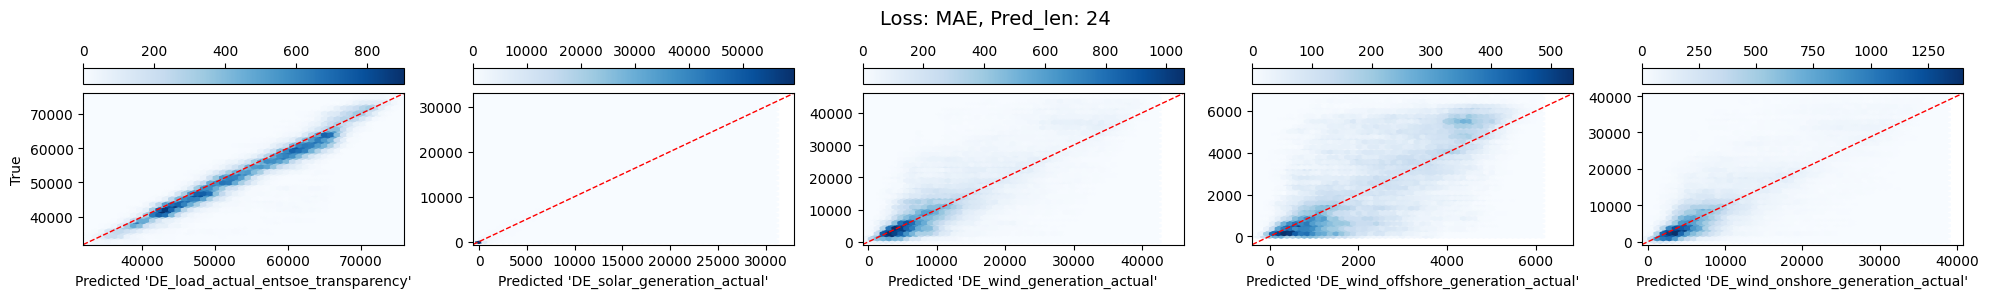

load actual          min value: 30945.33   max value: 77233.61   negative values:       0.00%
solar generation     min value: -1675.52   max value: 32947.00   negative values:      19.97%
wind generation      min value: -690.49    max value: 46064.00   negative values:       0.01%
wind offshore        min value: -70.11     max value: 6840.00    negative values:       0.02%
wind onshore         min value: -894.29    max value: 40752.00   negative values:       0.05%


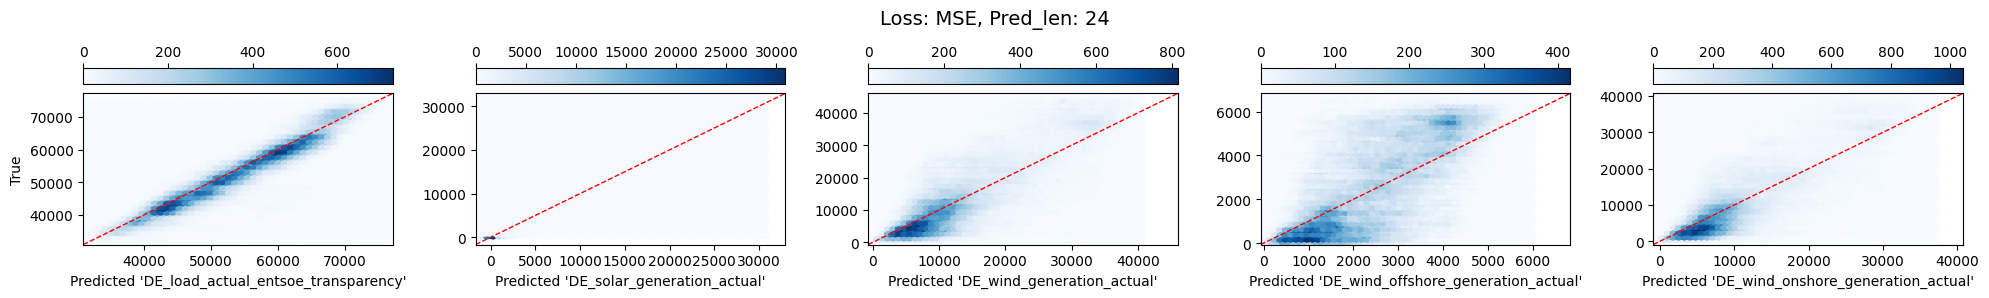

load actual          min value: 31182.01   max value: 76883.16   negative values:       0.00%
solar generation     min value: -1454.14   max value: 32947.00   negative values:      20.39%
wind generation      min value: -743.09    max value: 46064.00   negative values:       0.02%
wind offshore        min value: -22.18     max value: 6840.00    negative values:       0.00%
wind onshore         min value: -1085.00   max value: 40752.00   negative values:       0.06%


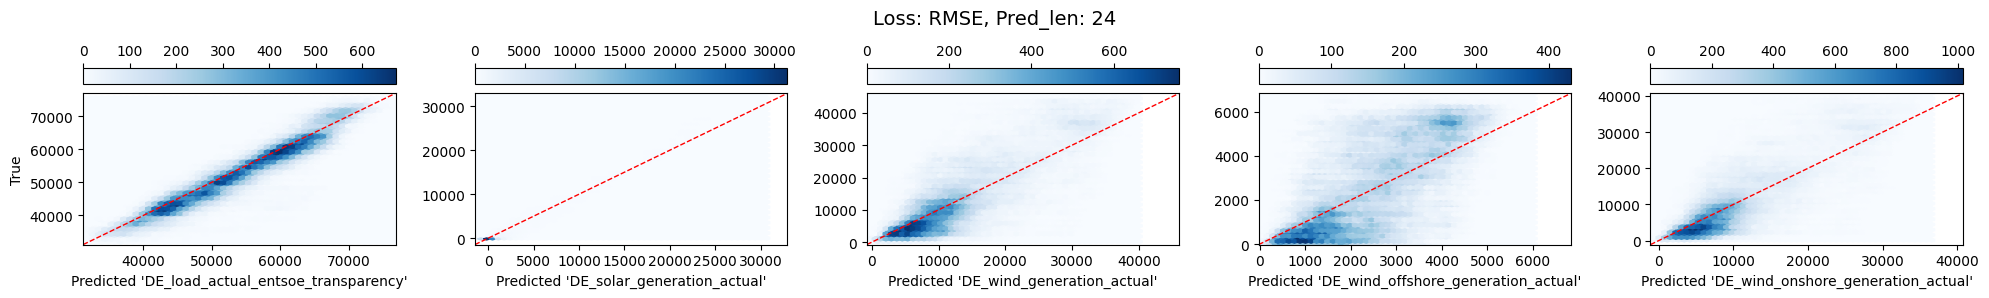

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 31324.80   max value: 75551.00   negative values:       0.00%
solar generation     min value: -2107.87   max value: 32947.00   negative values:      22.62%
wind generation      min value: 136.00     max value: 46064.00   negative values:       0.00%
wind offshore        min value: -175.57    max value: 6840.00    negative values:       0.04%
wind onshore         min value: -170.94    max value: 40752.00   negative values:       0.00%


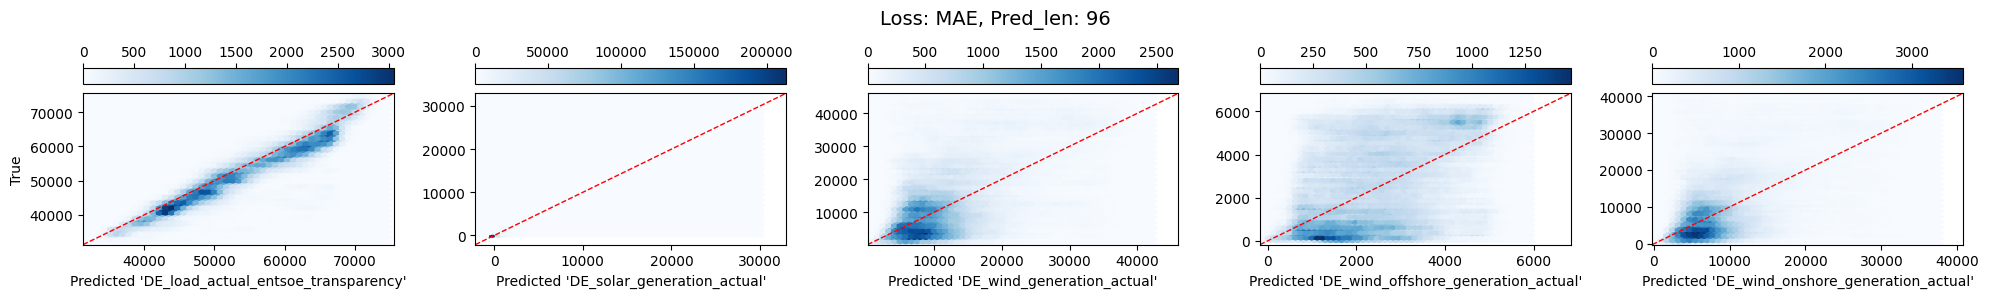

load actual          min value: 29614.44   max value: 78735.03   negative values:       0.00%
solar generation     min value: -3361.41   max value: 32947.00   negative values:      22.59%
wind generation      min value: 94.91      max value: 46064.00   negative values:       0.00%
wind offshore        min value: -186.28    max value: 6840.00    negative values:       0.00%
wind onshore         min value: -61.37     max value: 40752.00   negative values:       0.00%


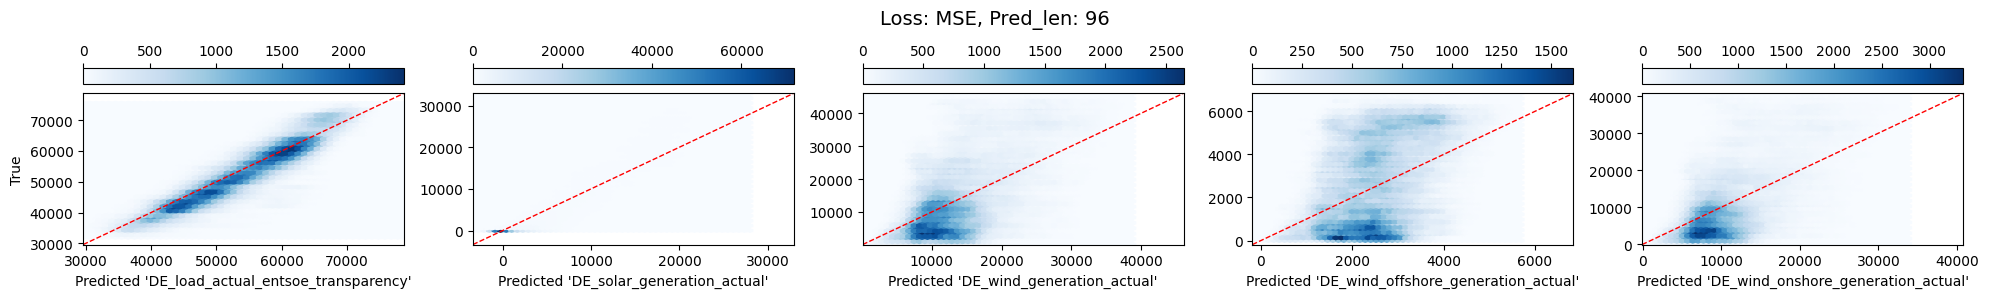

load actual          min value: 28936.75   max value: 77737.98   negative values:       0.00%
solar generation     min value: -3126.82   max value: 32947.00   negative values:      21.09%
wind generation      min value: 136.00     max value: 46064.00   negative values:       0.00%
wind offshore        min value: -219.05    max value: 6840.00    negative values:       0.00%
wind onshore         min value: -111.99    max value: 40752.00   negative values:       0.00%


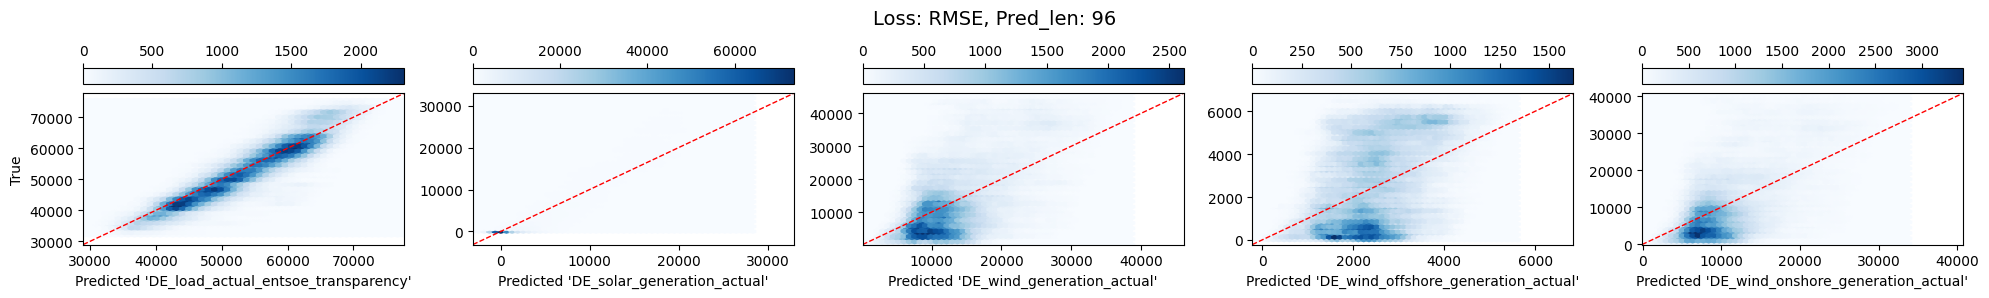

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 31923.00   max value: 75551.00   negative values:       0.00%
solar generation     min value: -2408.18   max value: 32947.00   negative values:      29.45%
wind generation      min value: -410.65    max value: 46064.00   negative values:       0.00%
wind offshore        min value: -0.00      max value: 6840.00    negative values:       0.00%
wind onshore         min value: -1091.36   max value: 40752.00   negative values:       0.00%


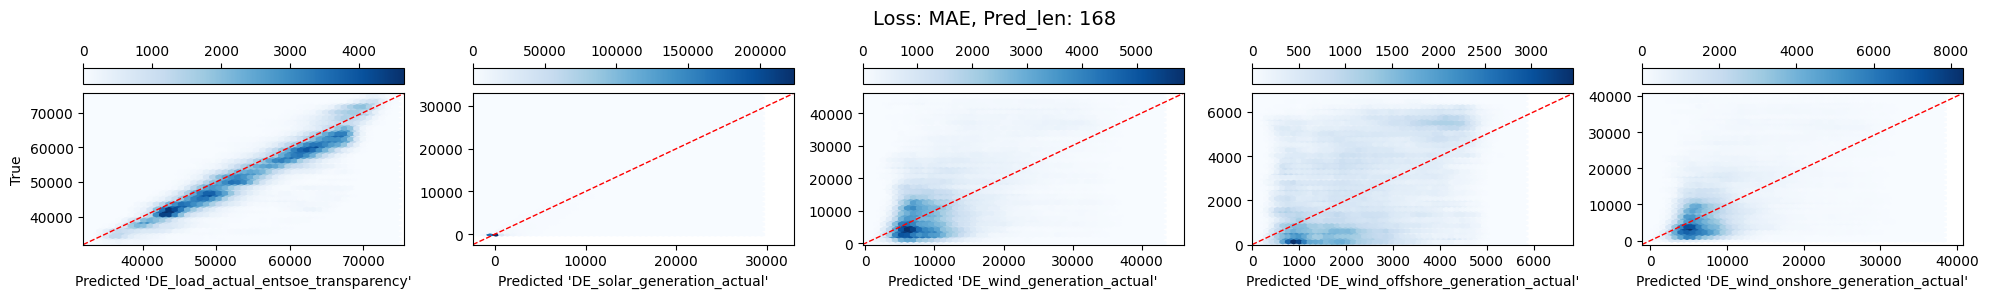

load actual          min value: 29444.51   max value: 77929.88   negative values:       0.00%
solar generation     min value: -3805.89   max value: 32947.00   negative values:      20.62%
wind generation      min value: 136.00     max value: 46064.00   negative values:       0.00%
wind offshore        min value: -0.00      max value: 6840.00    negative values:       0.00%
wind onshore         min value: 119.00     max value: 40752.00   negative values:       0.00%


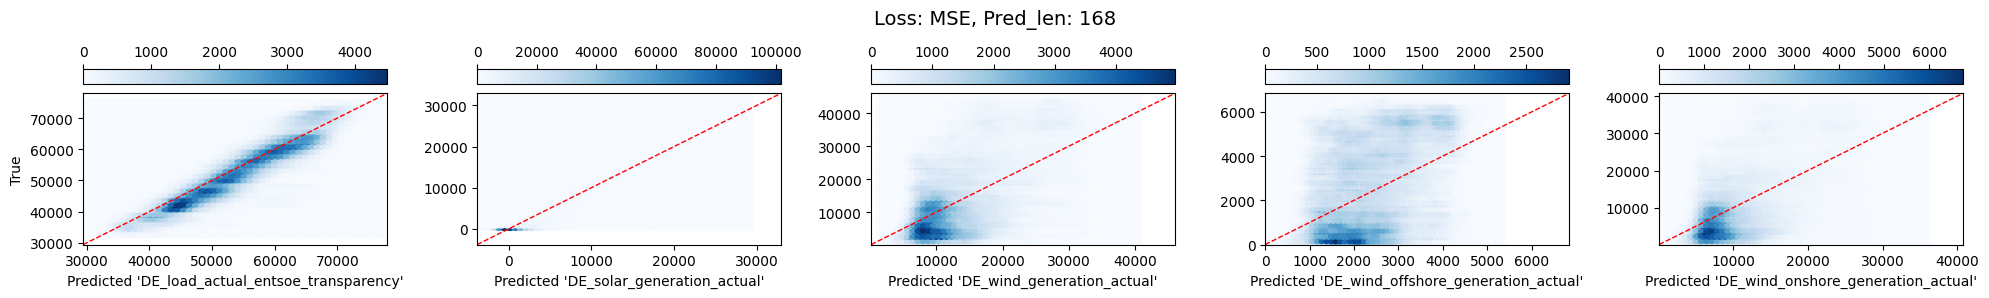

load actual          min value: 31323.64   max value: 76506.56   negative values:       0.00%
solar generation     min value: -3281.07   max value: 32947.00   negative values:      19.54%
wind generation      min value: 136.00     max value: 46064.00   negative values:       0.00%
wind offshore        min value: -6.99      max value: 6840.00    negative values:       0.00%
wind onshore         min value: 119.00     max value: 40752.00   negative values:       0.00%


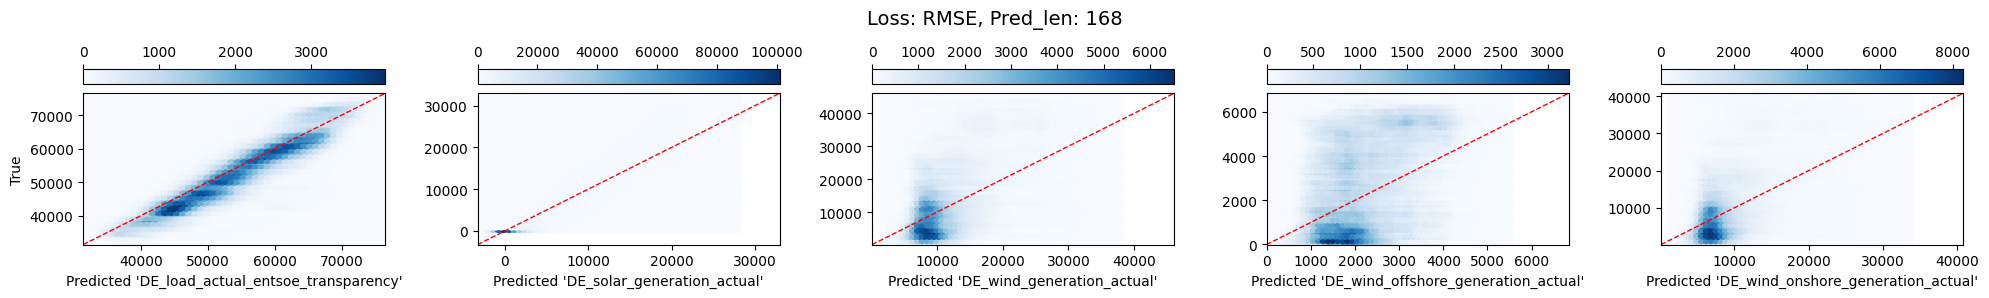

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [8]:
# Extract columns
cols = pd.read_csv("datasets/DE_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE", "RMSE"]):
        plot_error_results("Informer", loss, seq_len=96, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path="./standard_unscaled")
    print("-"*160)

# Standard Scaler PatchTST

load actual          min value: 31545.84   max value: 75618.58   negative values:       0.00%
solar generation     min value: -12856.81  max value: 32987.78   negative values:      24.07%
wind generation      min value: -1769.88   max value: 49107.72   negative values:       0.10%
wind offshore        min value: -497.91    max value: 7177.68    negative values:       0.43%
wind onshore         min value: -2601.19   max value: 43430.08   negative values:       0.29%


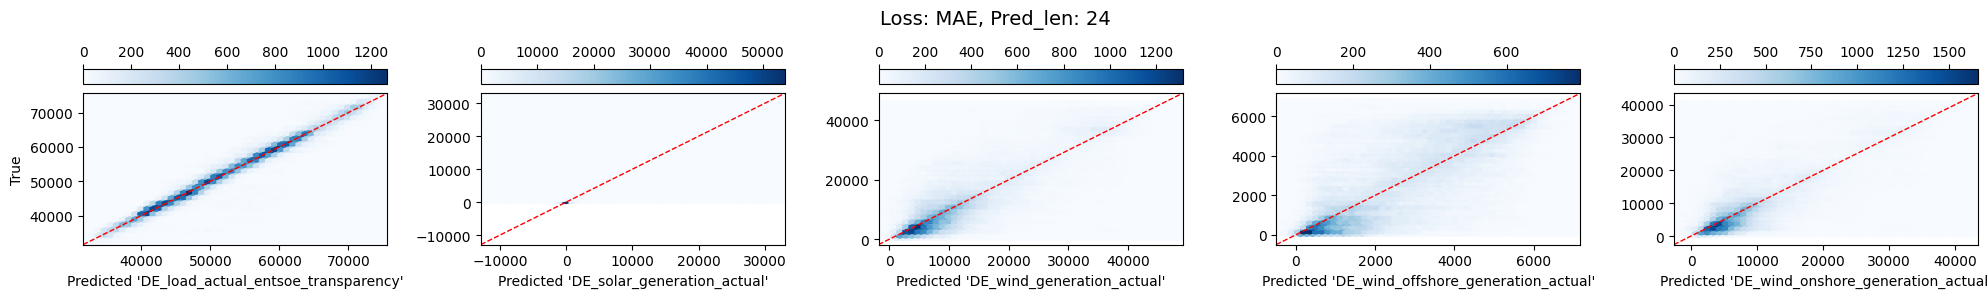

load actual          min value: 31163.03   max value: 76549.80   negative values:       0.00%
solar generation     min value: -5801.17   max value: 32947.00   negative values:      23.03%
wind generation      min value: -5227.37   max value: 48723.09   negative values:       0.24%
wind offshore        min value: -484.68    max value: 7078.55    negative values:       0.24%
wind onshore         min value: -6317.58   max value: 44686.79   negative values:       0.55%


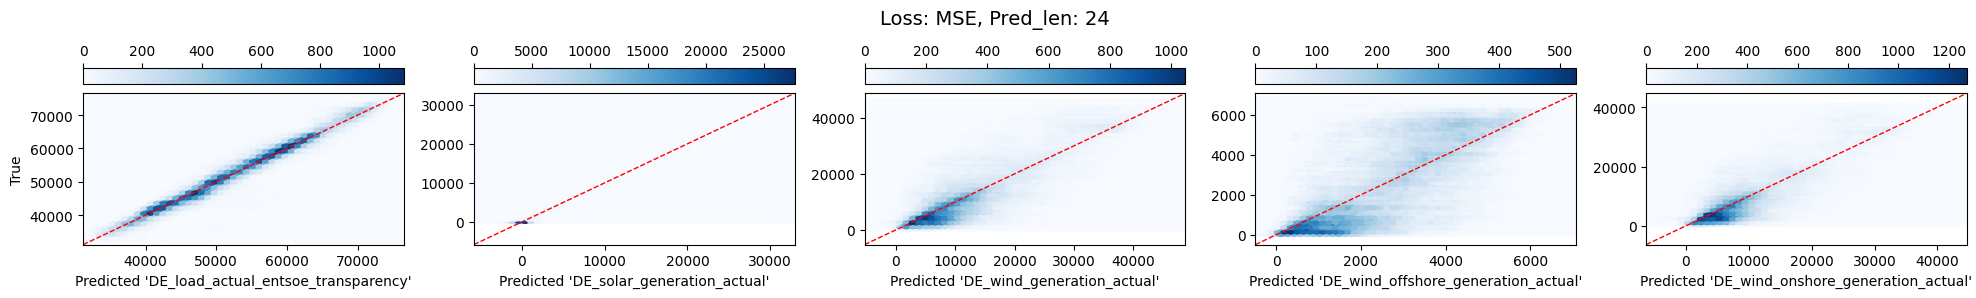

load actual          min value: 30660.34   max value: 76477.72   negative values:       0.00%
solar generation     min value: -6590.97   max value: 32947.00   negative values:      14.35%
wind generation      min value: -2293.42   max value: 49583.24   negative values:       0.18%
wind offshore        min value: -431.71    max value: 6840.00    negative values:       0.30%
wind onshore         min value: -3195.24   max value: 42957.06   negative values:       0.34%


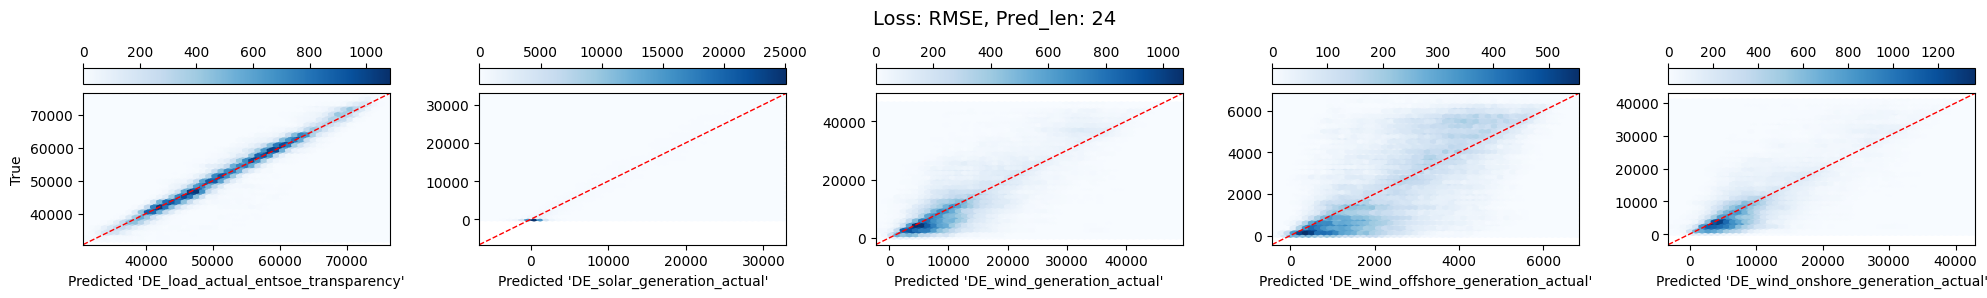

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 31694.96   max value: 75551.00   negative values:       0.00%
solar generation     min value: -17906.30  max value: 32947.00   negative values:      19.67%
wind generation      min value: -2005.63   max value: 48261.59   negative values:       0.03%
wind offshore        min value: -299.79    max value: 6840.00    negative values:       0.04%
wind onshore         min value: -2473.57   max value: 42296.02   negative values:       0.06%


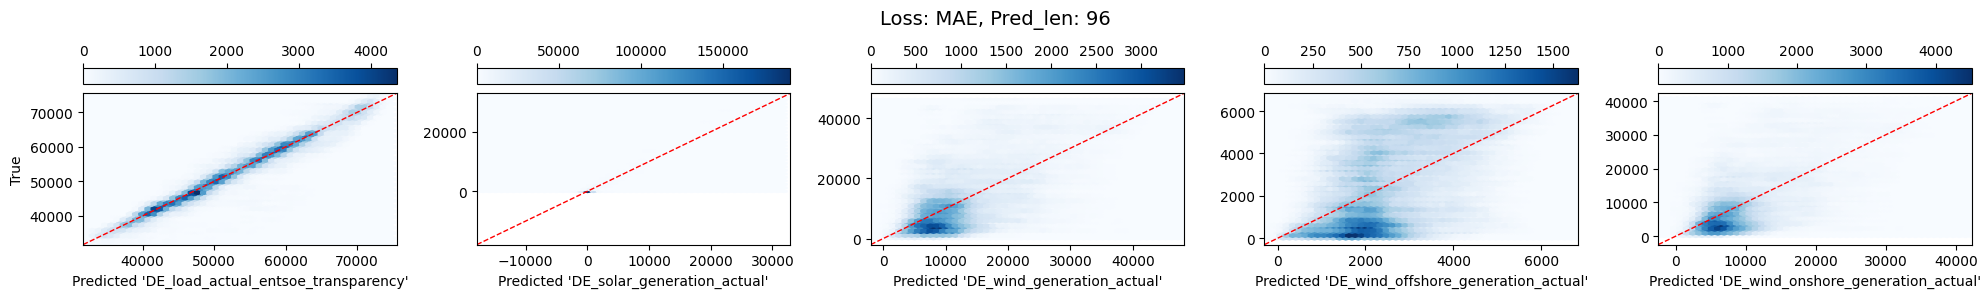

load actual          min value: 29979.69   max value: 75858.48   negative values:       0.00%
solar generation     min value: -9055.56   max value: 32947.00   negative values:      28.84%
wind generation      min value: -1662.36   max value: 46064.00   negative values:       0.01%
wind offshore        min value: -0.00      max value: 6840.00    negative values:       0.00%
wind onshore         min value: -2291.40   max value: 40752.00   negative values:       0.04%


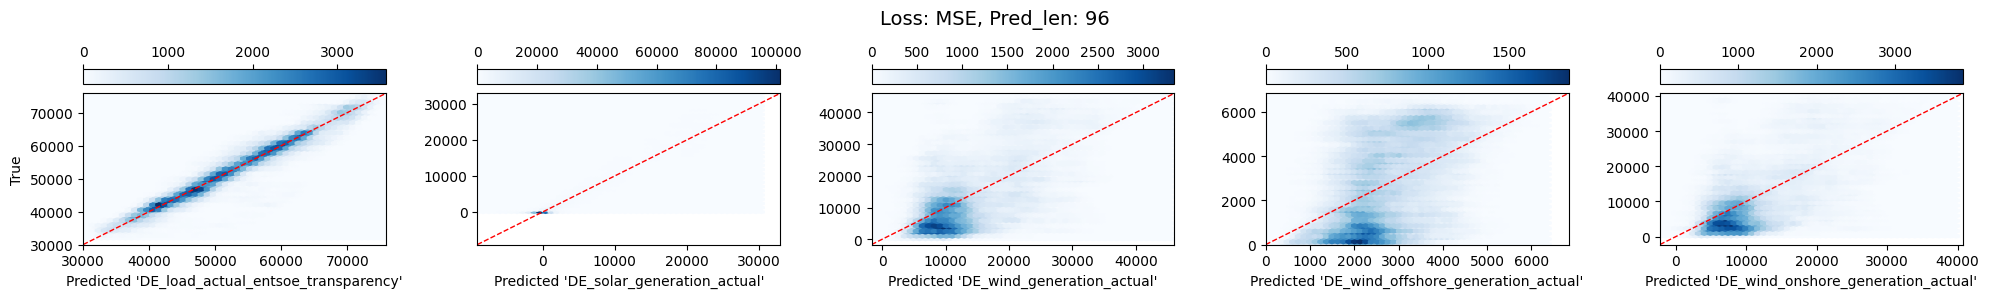

load actual          min value: 30860.43   max value: 75790.53   negative values:       0.00%
solar generation     min value: -11105.49  max value: 32947.00   negative values:      25.86%
wind generation      min value: -1886.37   max value: 46064.00   negative values:       0.01%
wind offshore        min value: -0.00      max value: 6840.00    negative values:       0.00%
wind onshore         min value: -2675.96   max value: 40752.00   negative values:       0.06%


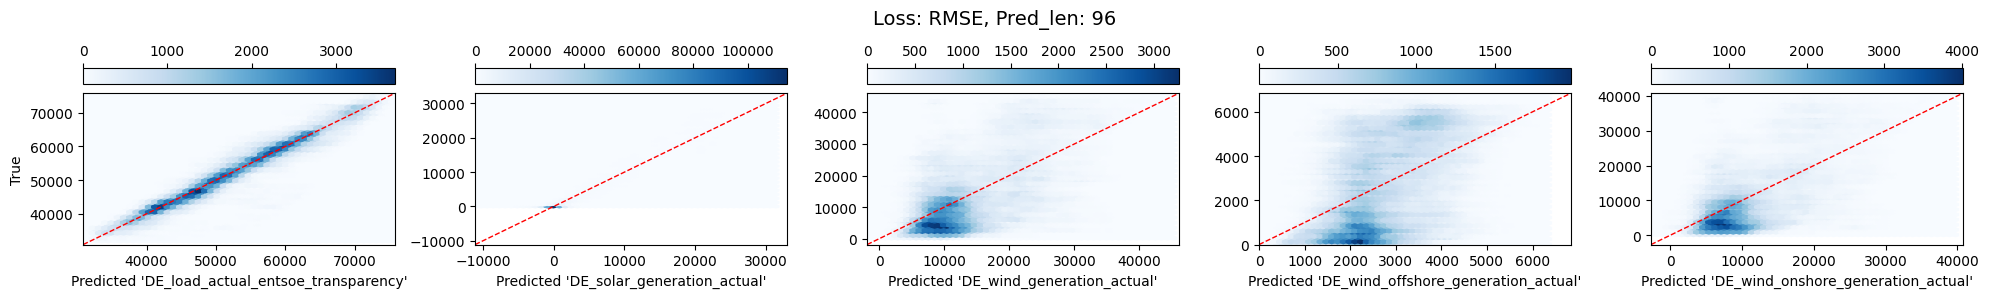

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 31035.66   max value: 75551.00   negative values:       0.00%
solar generation     min value: -10526.38  max value: 32947.00   negative values:      20.23%
wind generation      min value: -1595.05   max value: 46837.21   negative values:       0.01%
wind offshore        min value: -406.34    max value: 7081.33    negative values:       0.03%
wind onshore         min value: -2372.07   max value: 41270.11   negative values:       0.03%


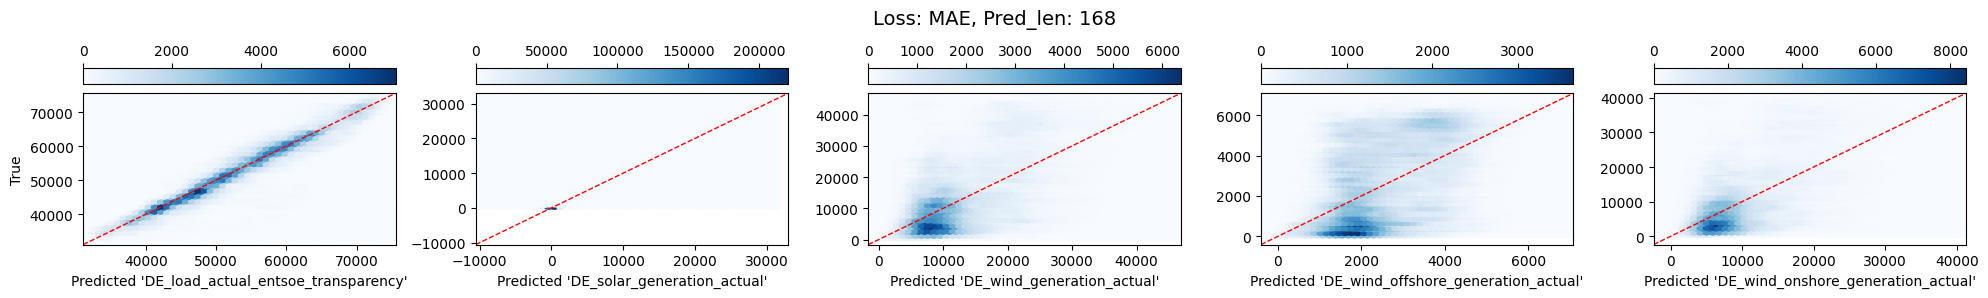

load actual          min value: 30113.39   max value: 75551.00   negative values:       0.00%
solar generation     min value: -8003.33   max value: 32947.00   negative values:      24.04%
wind generation      min value: -285.10    max value: 46064.00   negative values:       0.00%
wind offshore        min value: -116.20    max value: 6840.00    negative values:       0.00%
wind onshore         min value: -1341.93   max value: 40752.00   negative values:       0.01%


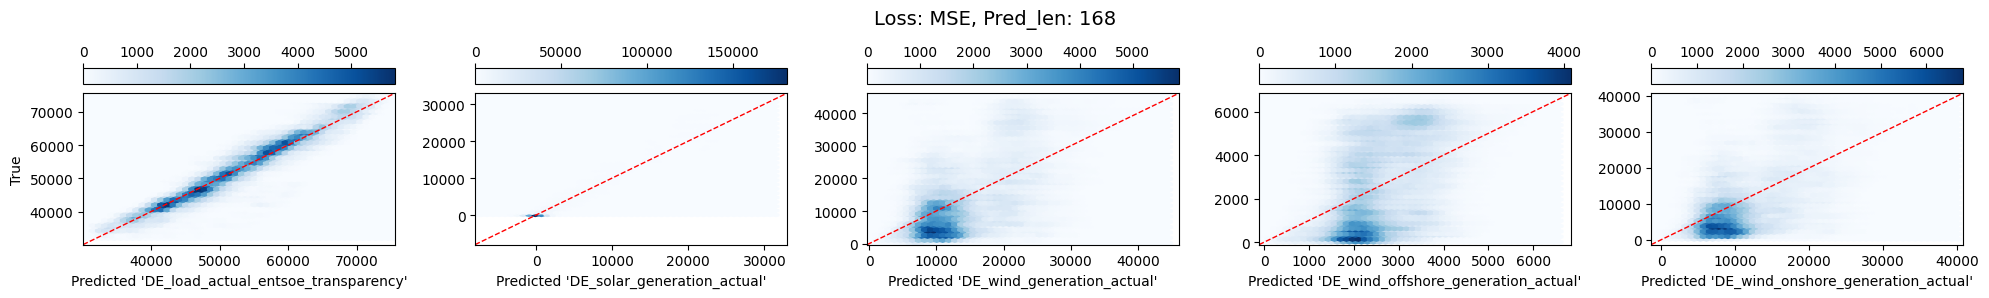

load actual          min value: 30070.96   max value: 75880.10   negative values:       0.00%
solar generation     min value: -7975.89   max value: 32947.00   negative values:      20.70%
wind generation      min value: -1474.01   max value: 46064.00   negative values:       0.00%
wind offshore        min value: -40.09     max value: 6840.00    negative values:       0.00%
wind onshore         min value: -1955.68   max value: 40752.00   negative values:       0.01%


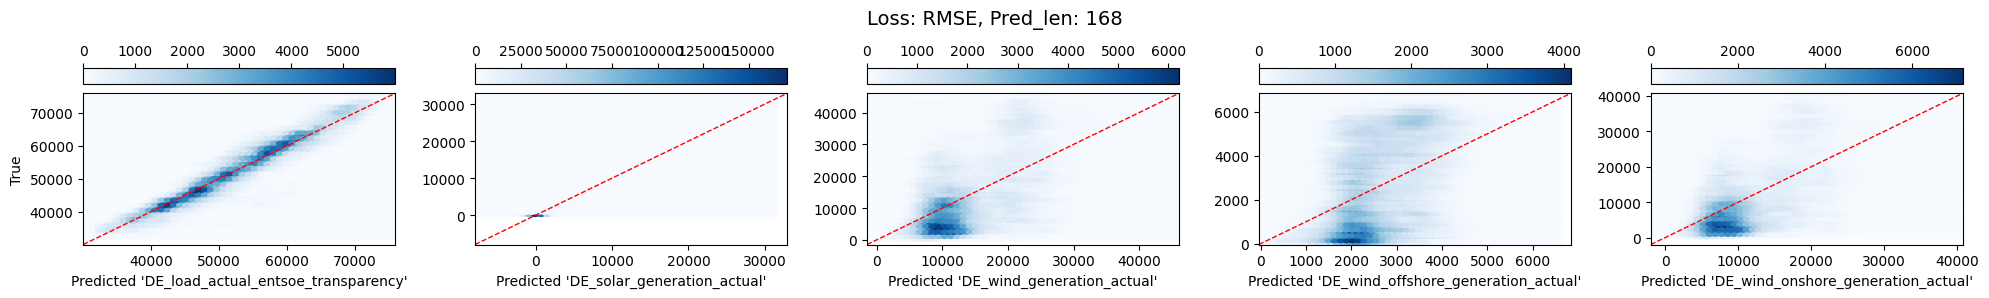

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [9]:
# Extract columns
cols = pd.read_csv("datasets/DE_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE", "RMSE"]):
        plot_error_results("PatchTST", loss, seq_len=512, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path="./standard_unscaled")
    print("-"*160)

# MinMax (0, 1) ReLu Informer

load actual          min value: 31923.00   max value: 77888.71   negative values:       0.00%
solar generation     min value: 0.00       max value: 32947.00   negative values:       0.00%
wind generation      min value: 136.00     max value: 46812.70   negative values:       0.00%
wind offshore        min value: 0.00       max value: 6840.00    negative values:       0.00%
wind onshore         min value: 119.00     max value: 43202.88   negative values:       0.00%


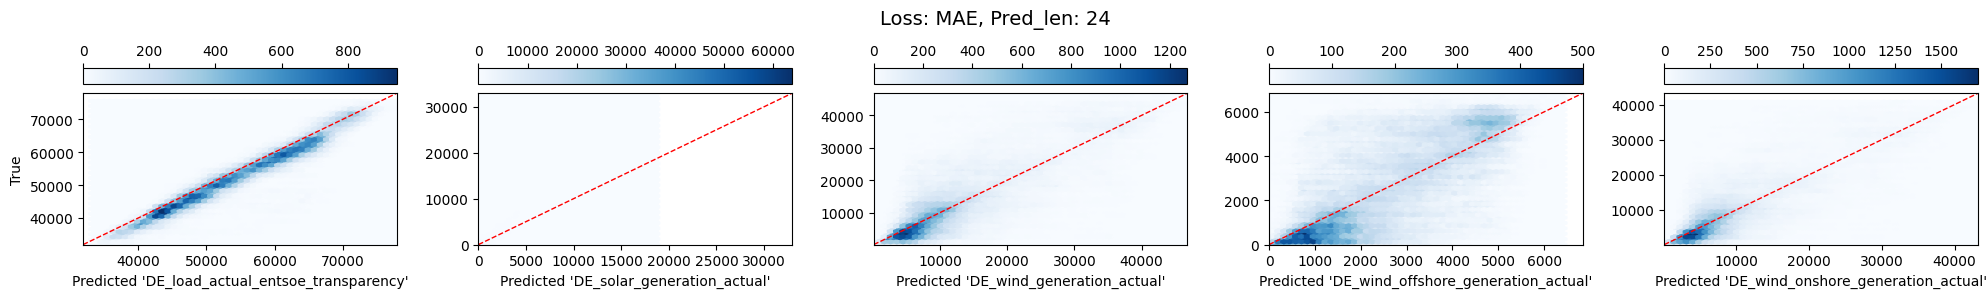

load actual          min value: 31307.00   max value: 78890.42   negative values:       0.00%
solar generation     min value: 0.00       max value: 33563.46   negative values:       0.00%
wind generation      min value: 135.00     max value: 46270.48   negative values:       0.00%
wind offshore        min value: 0.00       max value: 6840.00    negative values:       0.00%
wind onshore         min value: 119.00     max value: 41356.31   negative values:       0.00%


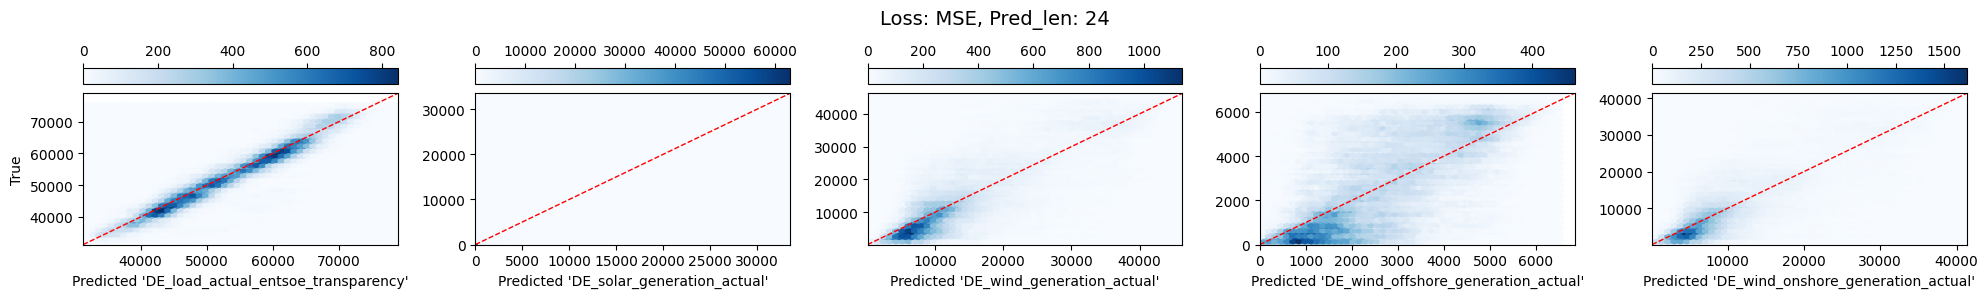

load actual          min value: 31307.00   max value: 77402.55   negative values:       0.00%
solar generation     min value: 0.00       max value: 32947.00   negative values:       0.00%
wind generation      min value: 136.00     max value: 46064.00   negative values:       0.00%
wind offshore        min value: 0.00       max value: 6840.00    negative values:       0.00%
wind onshore         min value: 119.00     max value: 40752.00   negative values:       0.00%


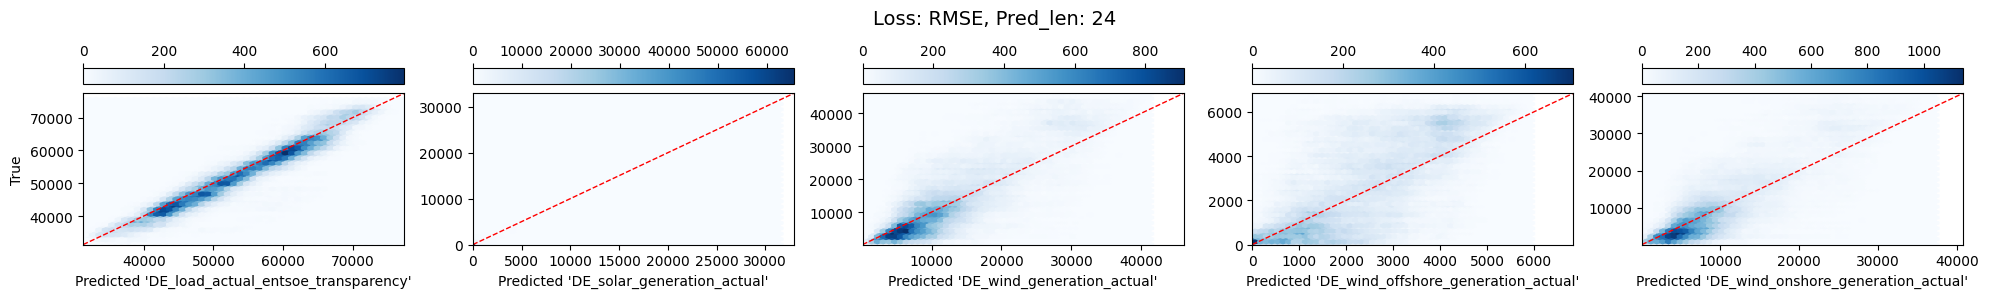

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 31307.00   max value: 81415.58   negative values:       0.00%
solar generation     min value: 0.00       max value: 34025.97   negative values:       0.00%
wind generation      min value: 136.00     max value: 46302.80   negative values:       0.00%
wind offshore        min value: 0.00       max value: 6840.00    negative values:       0.00%
wind onshore         min value: 119.00     max value: 41129.13   negative values:       0.00%


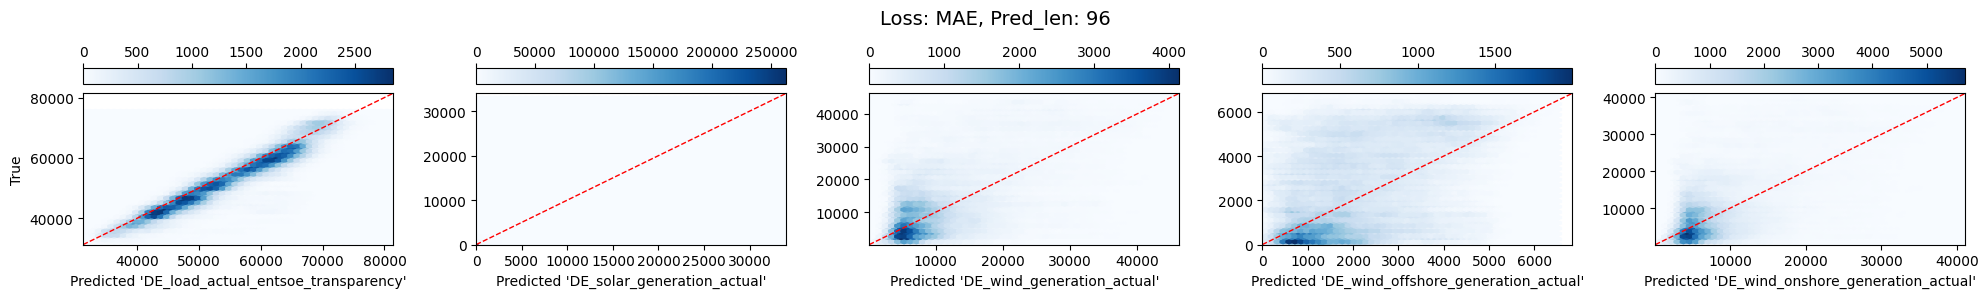

load actual          min value: 31307.00   max value: 79951.81   negative values:       0.00%
solar generation     min value: 0.00       max value: 32947.00   negative values:       0.00%
wind generation      min value: 136.00     max value: 46064.00   negative values:       0.00%
wind offshore        min value: 0.00       max value: 6840.00    negative values:       0.00%
wind onshore         min value: 119.00     max value: 40752.00   negative values:       0.00%


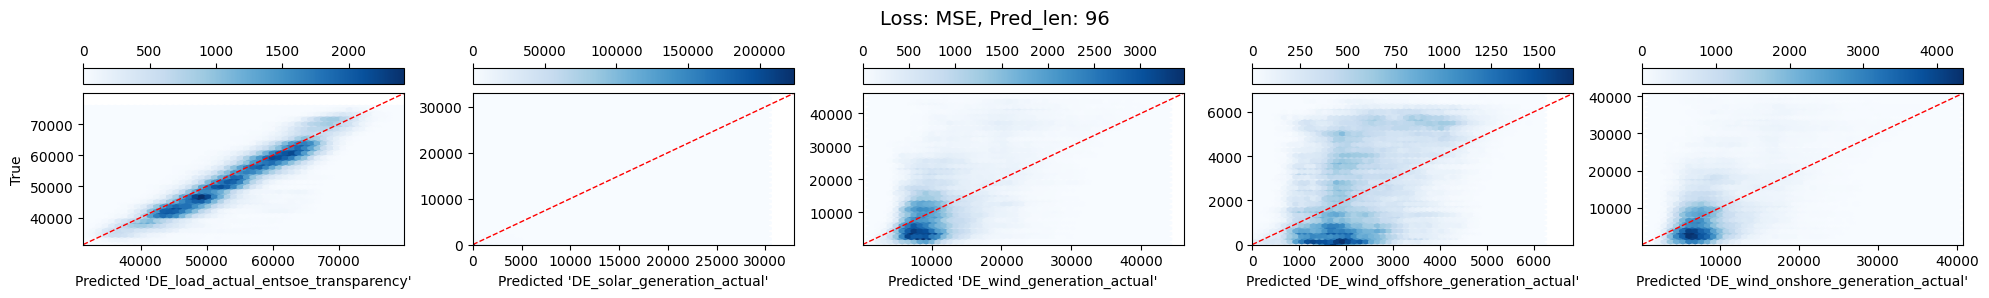

load actual          min value: 31307.00   max value: 79937.38   negative values:       0.00%
solar generation     min value: 0.00       max value: 32947.00   negative values:       0.00%
wind generation      min value: 136.00     max value: 48253.87   negative values:       0.00%
wind offshore        min value: 0.00       max value: 6840.00    negative values:       0.00%
wind onshore         min value: 119.00     max value: 43765.38   negative values:       0.00%


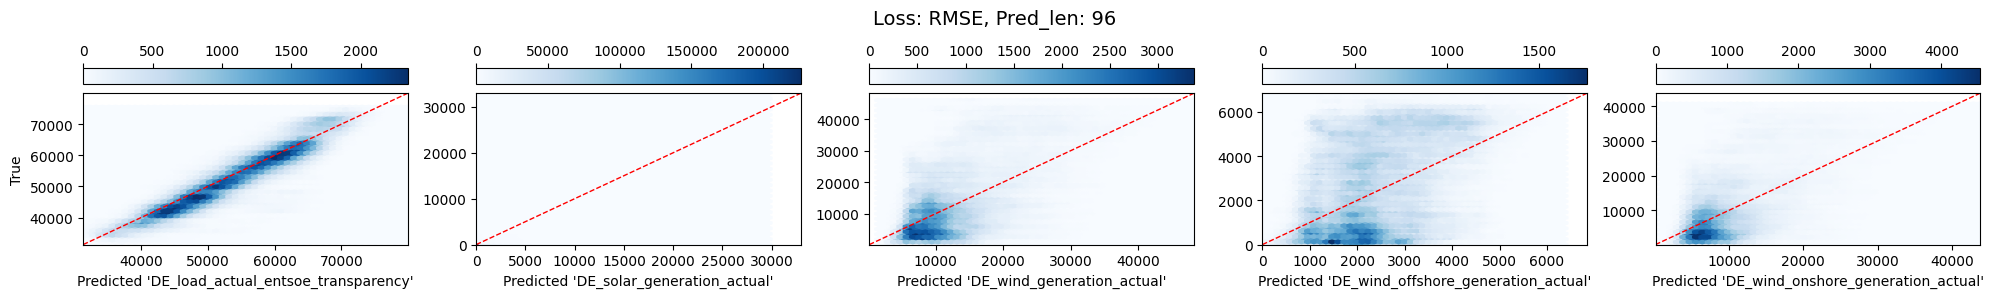

----------------------------------------------------------------------------------------------------------------------------------------------------------------


ValueError: cannot reshape array of size 4784096 into shape (6048,168,5)

In [10]:
# Extract columns
cols = pd.read_csv("datasets/DE_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE", "RMSE"]):
        plot_error_results("Informer", loss, seq_len=96, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path="./minmax_0_1_relu_unscaled")
    print("-"*160)

In [12]:
4784096/(168*5)

5695.352380952381

# MinMax (0, 1) ReLu PatchTST

# MinMax (0, 5) ReLu Informer

# MinMax (0, 5) ReLu PatchTST